In [104]:
# Exemplo de Projeto de um observador de estados de ordem mínima

In [105]:
import numpy as np
import sympy as sp
import control
import control.matlab
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg

In [106]:
#  Matrizes do Sistema
A = np.matrix('0 1 0;0 0 1;-6 -11 -6');
B = np.matrix('0; 0; 1');
C = np.matrix('1 0 0');
D = 0;

sistema = control.ss(A,B,C,D);

In [107]:
# Resposta ao degrau
tfinal = 7;
t = np.linspace(0, tfinal, 1000) 
u = np.ones(len(t));
ystep, t, X = control.matlab.lsim(sistema,u,t);

In [108]:
# separando os elemntos do vetor X
x1step = X[:,0];
x2step = X[:,1];
x3step = X[:,2];

In [109]:
# observador de ordem mínima
Abb = np.matrix('0 1;-11 -6');
Aab = np.matrix('1 0');
L = [-10, -10];
Ke = np.transpose(control.acker(np.transpose(Abb),np.transpose(Aab),L))

Aaa = 0;
Aba = np.matrix('0;-6');
Ba = 0;
Bb = np.matrix('0;1');

Achapeu = Abb-Ke*Aab;
Bchapeu = Achapeu*Ke+Aba-Ke*Aaa;
Fchapeu = Bb-Ke*Ba;

Cchapeu = np.matrix('0 0;1 0;0 1');
Dchapeu = np.block([[1], [Ke]]);

In [110]:
# simulação com equações recursivas
# definindo o intervalo de simulação e o vetor de entrada
T = 0.02;
tfinal = 7;
Kmax = int(tfinal/T+1);
k = np.linspace(0, Kmax, Kmax+1)
u = np.ones(len(k));

# definindo os vetores
x1 = np.zeros(len(k));
x2 = np.zeros(len(k));
x3 = np.zeros(len(k));
x1_ponto = np.zeros(len(k));
x2_ponto = np.zeros(len(k));
x3_ponto = np.zeros(len(k));
y = np.zeros(len(k));
eta1 = np.zeros(len(k));
eta2 = np.zeros(len(k));
eta1_ponto = np.zeros(len(k));
eta2_ponto = np.zeros(len(k));
xtil1 = np.zeros(len(k));
xtil2 = np.zeros(len(k));
xtil3 = np.zeros(len(k));


# condições iniciais (podem ser diferentes de zero)
x1[0] = 0;  #  para k = 0
x2[0] = 0;  #  para k = 0
x3[0] = 0;  #  para k = 0
x1_ponto[0] = 0;  #  para k = 0
x2_ponto[0] = 0;  #  para k = 0
x3_ponto[0] = 0;  #  para k = 0
y[0] = C[0,0]*x1[0]+C[0,1]*x2[0]+C[0,2]*x3[0]+D*u[0];  #  para k = 0

eta1[0] = 0;  #  para k = 0
eta2[0] = 0;  #  para k = 0
eta1_ponto[0] = Fchapeu[0]*u[0];  #  para k = 0
eta2_ponto[0] = Fchapeu[1]*u[0];  #  para k = 0

In [111]:
    for j in range(1,Kmax+1):
    # sistema original
        # Equações dos integradores
        x1[j]=T*x1_ponto[j-1]+x1[j-1];
        x2[j]=T*x2_ponto[j-1]+x2[j-1];    
        x3[j]=T*x3_ponto[j-1]+x3[j-1];
        # Equação diferencial de estados:  Xponto=A*X+B*U
        x1_ponto[j]=A[0,0]*x1[j]+A[0,1]*x2[j]+A[0,2]*x3[j]+B[0]*u[j];  
        x2_ponto[j]=A[1,0]*x1[j]+A[1,1]*x2[j]+A[1,2]*x3[j]+B[1]*u[j]; 
        x3_ponto[j]=A[2,0]*x1[j]+A[2,1]*x2[j]+A[2,2]*x3[j]+B[2]*u[j];  
        # Equação de Saída: Y=C*X+D*U
        y[j] = C[0,0]*x1[j]+C[0,1]*x2[j]+C[0,2]*x3[j]+D*u[j];
    # observador de ordem mínima
        # Equações dos integradores do observador
        eta1[j]=T*eta1_ponto[j-1]+eta1[j-1];
        eta2[j]=T*eta2_ponto[j-1]+eta2[j-1];
        # Equação diferencial de estados do observador
        eta1_ponto[j]=Achapeu[0,0]*eta1[j]+Achapeu[0,1]*eta2[j]+Bchapeu[0]*y[j]+Fchapeu[0]*u[j];
        eta2_ponto[j]=Achapeu[1,0]*eta1[j]+Achapeu[1,1]*eta2[j]+Bchapeu[1]*y[j]+Fchapeu[1]*u[j];
        # equação de saída do observador de ordem mínima
        xtil1[j]=Cchapeu[0,0]*eta1[j]+Cchapeu[0,1]*eta2[j]+Dchapeu[0]*y[j];
        xtil2[j]=Cchapeu[1,0]*eta1[j]+Cchapeu[1,1]*eta2[j]+Dchapeu[1]*y[j];
        xtil3[j]=Cchapeu[2,0]*eta1[j]+Cchapeu[2,1]*eta2[j]+Dchapeu[2]*y[j];
        

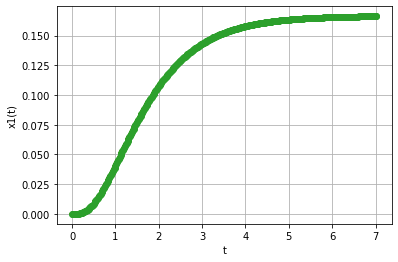

In [112]:
plt.figure()
plt.plot(t, x1step,k*T,x1,'*',k*T,xtil1,'o')
plt.xlabel("t")
plt.ylabel("x1(t)")
plt.grid(True)
plt.show()
 

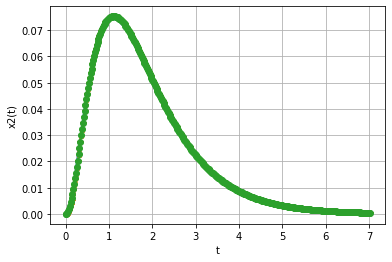

In [113]:
plt.figure()
plt.plot(t, x2step,k*T,x2,'*',k*T,xtil2,'o')
plt.xlabel("t")
plt.ylabel("x2(t)")
plt.grid(True)
plt.show()

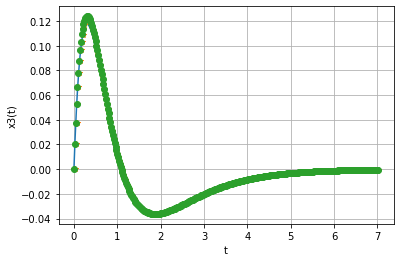

In [114]:
plt.figure()
plt.plot(t, x3step,k*T,x3,'*',k*T,xtil3,'o')
plt.xlabel("t")
plt.ylabel("x3(t)")
plt.grid(True)
plt.show()

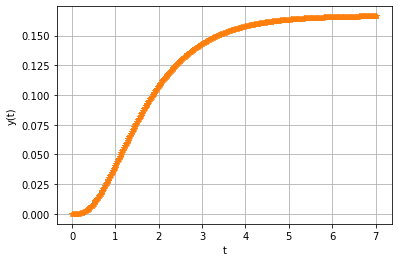

In [115]:
plt.figure()
plt.plot(t, ystep,k*T,y,'*')
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()  